In [1]:
# General
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset

# Paths and Files
from pathlib import Path
import os

# Data Processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model development and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Used to reformat a plot axis as a percentage
import hvplot.pandas
import seaborn as sns

# Quality of life improvements
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to improve readability

2024-01-17 12:16:08.566004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

## Loading the Data

In [2]:
# 10-year Treasury Bonds

# Initialize an empty dataframe
ten_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/10_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    ten_year_treasury_bond_df = pd.concat(
        [
            ten_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
ten_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
ten_year_treasury_bond_df.index = pd.to_datetime(ten_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
ten_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

ten_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1980-01-02,10.482,10.482,10.482,10.482,1.67%
1980-01-03,10.584,10.584,10.584,10.584,0.97%
1980-01-04,10.636,10.636,10.636,10.636,0.49%
1980-01-07,10.610,10.610,10.610,10.610,-0.24%
1980-01-08,10.553,10.553,10.553,10.553,-0.54%


In [3]:
# 2-year Treasury Bonds

# Initialize an empty dataframe
two_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/2_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    two_year_treasury_bond_df = pd.concat(
        [
            two_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
two_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
two_year_treasury_bond_df.index = pd.to_datetime(two_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
two_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

two_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1988-02-26,7.159,7.159,7.159,7.159,-0.47%
1988-02-29,7.125,7.125,7.125,7.125,-0.47%
1988-03-01,7.108,7.108,7.108,7.108,-0.24%
1988-03-02,7.090,7.090,7.090,7.090,-0.25%
1988-03-03,7.090,7.090,7.090,7.090,0.00%


In [4]:
# 3-month Treasury Bonds

# Initialize an empty dataframe
three_month_treasury_bond_df = pd.DataFrame(columns=["DATE","DTB3"])

# Set the folder path
folder_path = Path("./Resources/3_month_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    three_month_treasury_bond_df = pd.concat(
        [
            three_month_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
three_month_treasury_bond_df.set_index('DATE', inplace=True)

# Format the index as a datetime
three_month_treasury_bond_df.index = pd.to_datetime(three_month_treasury_bond_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
three_month_treasury_bond_df.sort_values(by=['DATE'], inplace=True)


three_month_treasury_bond_df.head()

,DTB3
DATE,
1954-01-04,1.330
1954-01-05,1.280
1954-01-06,1.280
1954-01-07,1.310
1954-01-08,1.310


In [5]:
# S&P Prices (OLD)

# Initialize an empty dataframe
sp500_old_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Vol.","Change %"])

# Set the folder path
folder_path = Path("./Resources/sp500_old")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_old_df = pd.concat(
        [
            sp500_old_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_old_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_old_df.index = pd.to_datetime(sp500_old_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
sp500_old_df.sort_values(by=['Date'], inplace=True)

sp500_old_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1979-12-26,107.8,107.8,108.4,107.1,NaN,0.09%
1979-12-27,108.0,108.0,108.5,107.1,NaN,0.19%
1979-12-28,107.8,107.8,108.6,107.2,NaN,-0.19%
1979-12-31,107.9,107.9,108.5,107.3,NaN,0.09%
1980-01-01,107.9,107.9,107.9,107.9,NaN,0.00%


In [6]:
# S&P Prices

# Initialize an empty dataframe
sp500_df = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

# Set the folder path
folder_path = Path("./Resources/sp500")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_df = pd.concat(
        [
            sp500_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_df.index = pd.to_datetime(sp500_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
sp500_df.sort_values(by=['Date'], inplace=True)

sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


In [7]:
# T-Bill Summary

# Initialize an empty dataframe
tbill_summary_df = pd.DataFrame(columns=["date","US1M","US3M","US6M","US1Y","US2Y","US3Y","US5Y","US7Y","US10Y","US20Y","US30Y"])

# Set the folder path
folder_path = Path("./Resources/summary_spreadsheet")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    tbill_summary_df = pd.concat(
        [
            tbill_summary_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
tbill_summary_df.set_index('date', inplace=True)

# Format the index as a datetime
tbill_summary_df.index = pd.to_datetime(tbill_summary_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
tbill_summary_df.sort_values(by=['date'], inplace=True)

tbill_summary_df.head()

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [8]:
tbill_summary_df = pd.concat([tbill_summary_df, three_month_treasury_bond_df], axis=1)
tbill_summary_df

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y,DTB3
1954-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330
1954-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280
1954-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310
1954-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
2024-01-02,5.55,5.46,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08,5.22
2024-01-03,5.54,5.48,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05,5.24
2024-01-04,5.56,5.48,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13,5.24


## DC Start

### Helper Functions

### Confusion Matrix Plot Function

In [9]:
def plot_confusion_matrix(
    cm, # confusion_matrix from sklearn.metrics
    classes, # formatted as a list, e.g. ['sell','buy']
    title=None, # Title of the plot
    normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='confusion_matrix', # Filename in the savefig string
    cmap='gray_r', # Inverse grayscale
    linecolor='k', # Set the line color to black
    labelplot=False # Label the plot with TP, FP, FN, and TN
    ):

    # If the labelplot is turned on, then treat the composite text as a string
    if labelplot:
        fmt = 's'
    else:
        # If labelplot is turned off, but the confusion_matrix is normalized, then format the string as having 3 integers to the right of the decimal
        if normalize:
            fmt = '.3f'
        # If labelplot is turned off and the confusion matrix is not normalized, then format the string as a decimal integer
        else:
            fmt = 'd'

    # The confusion_matrix text, as oriented in sklearn.metrics.confusion_matrix
    cm_text = np.array([['(TN)','(FP)'],['(FN)','(TP)']])

    # Create the annotation text for Seaborn
    # If labelplot is true, add the "TN, FP, FN, and TP" text to the confusion matrix values
    if labelplot:
        # If the confusion matrix is normalized, format the data as a string having 3 integers to the right of the decimal
        if normalize:
            annot_text = (
                np.asarray(
                    [
                        "{0:.3f}\n{1}".format(data, text) for data, text in zip(cm.flatten(), cm_text.flatten())
                    ]
                )
        ).reshape(2, 2)
        # If the confusion matrix is not normalized, format the string as a decimal integer
        else:
            annot_text = (
                np.asarray(
                    [
                        "{0:d}\n{1}".format(data, text) for data, text in zip(cm.flatten(), cm_text.flatten())
                    ]
                )
            ).reshape(2, 2)
    # If labelplot is false, then only print the confusion matrix values
    else:
        annot_text = True
    
    # Create a figure instance and set the figure size in inches
    # The figure size includes the title and labels
    fig, ax = plt.subplots(figsize=(3,3))

    # Plot the confusion_matrix using the heatmap function
    sns.heatmap(
        cm, 
        fmt=fmt, 
        annot=annot_text, 
        square=True,
        xticklabels=classes,
        yticklabels=classes,
        cmap=cmap,
        vmin=0,
        vmax=0,
        linewidths=0.5,
        linecolor=linecolor,
        cbar=False
    )

    # Return the outer borders using despine
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title(title) # Set the plot title
    plt.ylabel('Actual outcome') # Set the y-axis label
    plt.xlabel('Predicted outcome') # Set the x-axis label
    plt.tight_layout() # Remove whitespace around the plot
    plt.savefig(Path(f"./Reports/{filename}_confusion_matrix.png")) # Save the figure
    plt.show()

### Cumulative Returns Plotting Function

In [10]:
def cumulative_returns_plot(
    predictions_df_arg # Dataframe with only daily return values
    , plot_filename # Filename for saving the plot
    , plot_title_text="Cumulative Returns:" # Variable and default value for the plot title
):

    # Initialize the figure, including the size
    fig = (1 + predictions_df_arg).cumprod().plot(
        figsize=(14,8)
    )
    
    # Add a title to the plot
    plt.title(f"{plot_title_text}") 
    
    # Create a variable that refers to the axis
    ax = plt.gca()
    
    # Set the x- and y-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent')
    
    # Format the y-axis as a percentage
    # The kwarg in PercentFormatter is the float value used as the divisor to create the percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # Rescale the axis boundaries
    # ax.axis([
    #     min(signals_df.index) - (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Minimum value on the x-axis
    #     max(signals_df.index) + (0.025 * ( max(signals_df.index) - min(signals_df.index) ) ), # Maximum value on the x-axis
    #     0,
    #     1.4
    # ])
    
    # Add a horizontal line to improve readability
    # ax.axhline(y=1, color='k', linestyle="--", alpha=0.2)
    
    # Create a light grid to improve readability
    ax.grid(which='major', color='k', linestyle='--', alpha=0.2)
    
    # Set the legend paramters
    plt.legend(
        framealpha=1.0, # Make the legend opaque
        edgecolor='k' # Set the edge color to black
    )

    # Reduce the whitespace around the plot
    plt.tight_layout()
    
    # Save the figure as a PNG
    relative_file_path = "./Plots/" + str(plot_filename) + ".png"
    plt.savefig(Path(relative_file_path))
    
    return plt.show()

### Reviewing the Dataframe:

In [11]:
# Review the S&P 500 data
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


### Creating a reference dataframe for standardization:

In [12]:
# # Create a reference dataframe

# Move the Adjusted Close data to the new dataframe
# sp500_reference_dataframe = sp500_df[['Adj Close']].copy()
sp500_reference_dataframe = sp500_df[['Adj Close']].loc["1962-01-02":"2024-01-08"].copy()
# sp500_reference_dataframe = sp500_df[['Adj Close']].loc["2022-01-01":"2022-06-01"].copy()

# Create a Daily Returns column from the Close data
sp500_reference_dataframe['Daily Returns'] = sp500_reference_dataframe['Adj Close'].pct_change()

### Manual Signals

In [13]:
# Make a copy of the S&P Close dataframe
manual_signals_df = sp500_df[['Adj Close']].copy()

manual_signals_df['Manual Signal'] = 0.0
manual_signals_df.loc["1962-01-02":"1968-11-28", 'Manual Signal'] = 1.0
manual_signals_df.loc["1970-05-26":"1973-01-10", 'Manual Signal'] = 1.0
manual_signals_df.loc["1974-10-03":"1976-12-30", 'Manual Signal'] = 1.0
manual_signals_df.loc["1982-08-12":"1987-08-24", 'Manual Signal'] = 1.0
manual_signals_df.loc["1987-12-04":"1990-07-15", 'Manual Signal'] = 1.0
manual_signals_df.loc["1990-10-11":"2000-03-22", 'Manual Signal'] = 1.0
manual_signals_df.loc["2002-10-09":"2007-10-08", 'Manual Signal'] = 1.0
manual_signals_df.loc["2009-03-09":"2010-04-22", 'Manual Signal'] = 1.0
manual_signals_df.loc["2010-07-02":"2011-04-28", 'Manual Signal'] = 1.0
manual_signals_df.loc["2011-10-03":"2018-09-19", 'Manual Signal'] = 1.0
manual_signals_df.loc["2018-12-24":"2020-02-18", 'Manual Signal'] = 1.0
manual_signals_df.loc["2020-03-23":"2022-01-03", 'Manual Signal'] = 1.0
manual_signals_df.loc["2022-10-12":"2024-01-08", 'Manual Signal'] = 1.0

manual_signals_df = manual_signals_df.dropna()

manual_signals_df.head()

,Adj Close,Manual Signal
Date,,
1962-01-02,70.959999,1.0
1962-01-03,71.129997,1.0
1962-01-04,70.639999,1.0
1962-01-05,69.660004,1.0
1962-01-08,69.120003,1.0


### Trading Signals: SMA Window Comparison

In [14]:
# # Trading Signals: SMA Window Comparison

# Create the dataframe
sma_window_comparison_df = sp500_reference_dataframe.copy()

# Set the short and long SMA windows (in days)
sma_short_window = 4
sma_long_window = 15

# Create columns for the Rolling Window values
sma_window_comparison_df['Short SMA'] = sma_window_comparison_df['Adj Close'].rolling(window=sma_short_window).mean()
sma_window_comparison_df['Long SMA'] = sma_window_comparison_df['Adj Close'].rolling(window=sma_long_window).mean()

# Create a trading signal based on the SMAs
sma_window_comparison_df['SMA Signal'] = np.where(sma_window_comparison_df['Short SMA'] >= sma_window_comparison_df['Long SMA'], 1.0, 0.0)

# Create a SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_window_comparison_df['SMA Signal Daily Returns'] = sma_window_comparison_df['Daily Returns'] * sma_window_comparison_df['SMA Signal'].shift()

In [15]:
# # Clean up the Dataframe and review it

# Drop the rows with NAs
sma_window_comparison_df = sma_window_comparison_df.dropna()

# Review the Dataframe
sma_window_comparison_df.head(50)

,Adj Close,Daily Returns,Short SMA,Long SMA,SMA Signal,SMA Signal Daily Returns
Date,,,,,,
1962-01-22,68.809998,0.000873,68.567499,69.427334,0.0,0.000000
1962-01-23,68.290001,-0.007557,68.560000,69.249334,0.0,-0.000000
1962-01-24,68.400002,0.001611,68.562500,69.067334,0.0,0.000000
1962-01-25,68.349998,-0.000731,68.462500,68.914667,0.0,-0.000000
1962-01-26,68.129997,-0.003219,68.292499,68.812667,0.0,-0.000000
1962-01-29,67.900002,-0.003376,68.195000,68.731334,0.0,-0.000000
1962-01-30,68.169998,0.003976,68.137499,68.666000,0.0,0.000000
1962-01-31,68.839996,0.009828,68.259998,68.658000,0.0,0.000000
1962-02-01,69.260002,0.006101,68.542500,68.650666,0.0,0.000000


### Trading Signals: SMA Inertia

In [16]:
# # SMA Inertia Signals

# Create the dataframe
sma_inertia_df = sp500_reference_dataframe.copy()

# Set the inertia SMA window (in days)
sma_inertia_window = 4

# Create columns for the Rolling Window value
sma_inertia_df['Inertia SMA'] = sma_inertia_df['Adj Close'].rolling(window=sma_inertia_window).mean()

# Create a Daily Returns column
sma_inertia_df['Inertia SMA Daily Returns'] = sma_inertia_df['Inertia SMA'].pct_change()

# Create a trading signal based on the inertial SMA
sma_inertia_df['Inertia SMA Signal'] = np.where(sma_inertia_df['Inertia SMA Daily Returns'] >= 0, 1.0, 0.0)

# Create an Inertia SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_inertia_df['Inertia SMA Signal Daily Returns'] = sma_inertia_df['Daily Returns'] * sma_inertia_df['Inertia SMA Signal'].shift()

In [17]:
# # Clean up the Dataframe and review it

# Drop the rows with NAs
sma_inertia_df = sma_inertia_df.dropna()

# Review the Dataframe
sma_inertia_df.head(50)

,Adj Close,Daily Returns,Inertia SMA,Inertia SMA Daily Returns,Inertia SMA Signal,Inertia SMA Signal Daily Returns
Date,,,,,,
1962-01-08,69.120003,-0.007752,70.137501,-0.006516,0.0,-0.000000
1962-01-09,69.150002,0.000434,69.642502,-0.007058,0.0,0.000000
1962-01-10,68.959999,-0.002748,69.222502,-0.006031,0.0,-0.000000
1962-01-11,69.370003,0.005946,69.150002,-0.001047,0.0,0.000000
1962-01-12,69.610001,0.003460,69.272501,0.001772,1.0,0.000000
1962-01-15,69.470001,-0.002011,69.352501,0.001155,1.0,-0.002011
1962-01-16,69.070000,-0.005758,69.380001,0.000397,1.0,-0.005758
1962-01-17,68.320000,-0.010859,69.117500,-0.003784,0.0,-0.010859
1962-01-18,68.389999,0.001025,68.812500,-0.004413,0.0,0.000000


### Trading Signals: Balanced Inertia, including future information

Note: These signals should be near perfect

In [18]:
# # SMA Balanced Inertia Signals

# Create the dataframe
sma_balanced_inertia_df = sp500_reference_dataframe.copy()

# Set the inertia SMA window (in days)
# Note this value must be odd
sma_balanced_inertia_window = 31

# If necessary, force the value to be odd
if sma_balanced_inertia_window % 2 == 0:
    sma_balanced_inertia_window += 1

# Create columns for the Rolling Window value
sma_balanced_inertia_df['Balanced Inertia SMA'] = sma_balanced_inertia_df['Adj Close'].rolling(window=sma_inertia_window, center=True).mean()

# Create a Daily Returns column
sma_balanced_inertia_df['Balanced Inertia SMA Daily Returns'] = sma_balanced_inertia_df['Balanced Inertia SMA'].pct_change()

# Create a trading signal based on the balanced inertial SMA
sma_balanced_inertia_df['Balanced Inertia SMA Signal'] = np.where(sma_balanced_inertia_df['Balanced Inertia SMA Daily Returns'] >= 0, 1.0, 0.0)

# Create a Balanced Inertia SMA Signal Daily Returns column
# Note that the signal column is shifted in the formula, because there is a delay between receiving the signal and implementing it
sma_balanced_inertia_df['Balanced Inertia SMA Signal Daily Returns'] = sma_balanced_inertia_df['Daily Returns'] * sma_balanced_inertia_df['Balanced Inertia SMA Signal'].shift()

In [19]:
sma_balanced_inertia_df.head(20)

,Adj Close,Daily Returns,Balanced Inertia SMA,Balanced Inertia SMA Daily Returns,Balanced Inertia SMA Signal,Balanced Inertia SMA Signal Daily Returns
Date,,,,,,
1962-01-02,70.959999,NaN,NaN,NaN,0.0,NaN
1962-01-03,71.129997,0.002396,NaN,NaN,0.0,0.000000
1962-01-04,70.639999,-0.006889,70.597500,NaN,0.0,-0.000000
1962-01-05,69.660004,-0.013873,70.137501,-0.006516,0.0,-0.000000
1962-01-08,69.120003,-0.007752,69.642502,-0.007058,0.0,-0.000000
1962-01-09,69.150002,0.000434,69.222502,-0.006031,0.0,0.000000
1962-01-10,68.959999,-0.002748,69.150002,-0.001047,0.0,-0.000000
1962-01-11,69.370003,0.005946,69.272501,0.001772,1.0,0.000000
1962-01-12,69.610001,0.003460,69.352501,0.001155,1.0,0.003460


### Composite Dataframe and Plots

In [20]:
# Composite Value

# Create the dataframe
composite_value_df = sp500_reference_dataframe[['Adj Close']].copy()

# Add the SMA Comparison values
composite_value_df['Short SMA'] = sma_window_comparison_df['Short SMA']
composite_value_df['Long SMA'] = sma_window_comparison_df['Long SMA']

# Add the Inertia SMA values
composite_value_df['Inertia SMA'] = sma_inertia_df['Inertia SMA']

# Add the Balanced Inertia SMA values
composite_value_df['Balanced Inertia SMA'] = sma_balanced_inertia_df['Balanced Inertia SMA']

In [21]:
composite_value_df = composite_value_df.dropna()

composite_value_df.head()

,Adj Close,Short SMA,Long SMA,Inertia SMA,Balanced Inertia SMA
Date,,,,,
1962-01-22,68.809998,68.567499,69.427334,68.567499,68.560000
1962-01-23,68.290001,68.560000,69.249334,68.560000,68.562500
1962-01-24,68.400002,68.562500,69.067334,68.562500,68.462500
1962-01-25,68.349998,68.462500,68.914667,68.462500,68.292499
1962-01-26,68.129997,68.292499,68.812667,68.292499,68.195000


<Axes: xlabel='Date'>

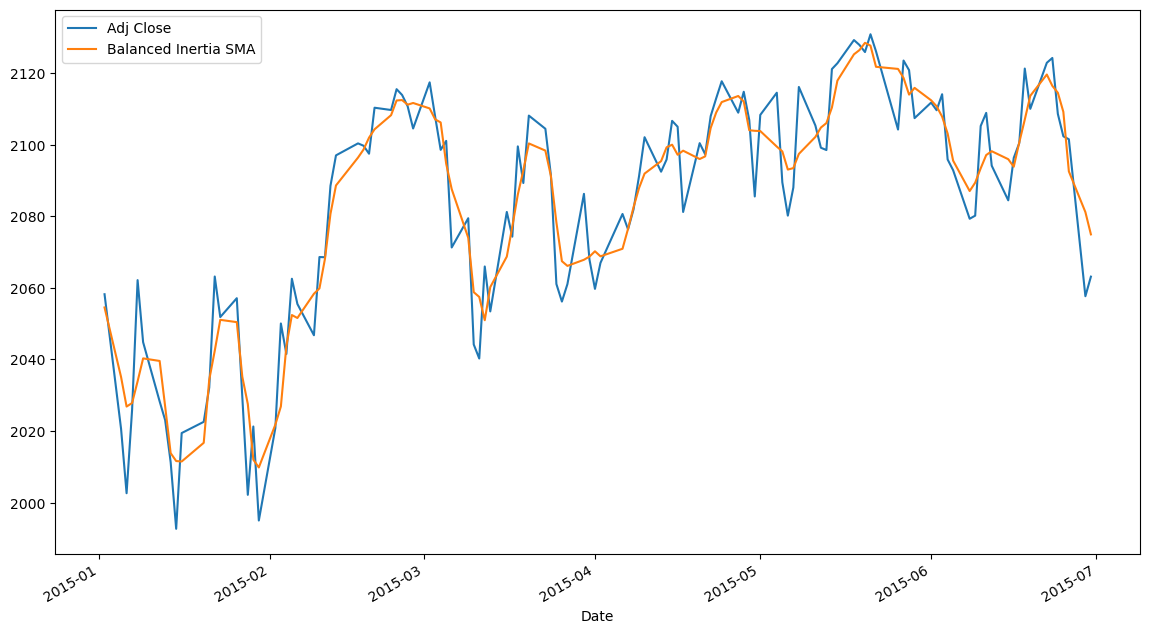

In [22]:
composite_value_df[[
    'Adj Close'
    # , 'Short SMA'
    # , 'Long SMA'
    # , 'Inertia SMA'
    , 'Balanced Inertia SMA'
]].loc['2015-01-01':'2015-06-30'].plot(
    figsize=(14,8),
    # marker="o"
)

In [23]:
# Composite Daily Returns

# Create the dataframe
composite_daily_returns_df = sp500_reference_dataframe[['Daily Returns']].copy()

# Add the SMA Comparison values
composite_daily_returns_df['SMA Signal Daily Returns'] = sma_window_comparison_df['SMA Signal Daily Returns']

# Add the Inertia SMA values
composite_daily_returns_df['Inertia SMA Signal Daily Returns'] = sma_inertia_df['Inertia SMA Signal Daily Returns']

# Add the Balanced Inertia SMA values
composite_daily_returns_df['Balanced Inertia SMA Signal Daily Returns'] = sma_balanced_inertia_df['Balanced Inertia SMA Signal Daily Returns']

In [24]:
composite_daily_returns_df = composite_daily_returns_df.dropna()

composite_daily_returns_df.head()

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns
Date,,,,
1962-01-22,0.000873,0.0,0.000000,0.000000
1962-01-23,-0.007557,-0.0,-0.000000,-0.000000
1962-01-24,0.001611,0.0,0.000000,0.001611
1962-01-25,-0.000731,-0.0,-0.000731,-0.000000
1962-01-26,-0.003219,-0.0,-0.000000,-0.000000


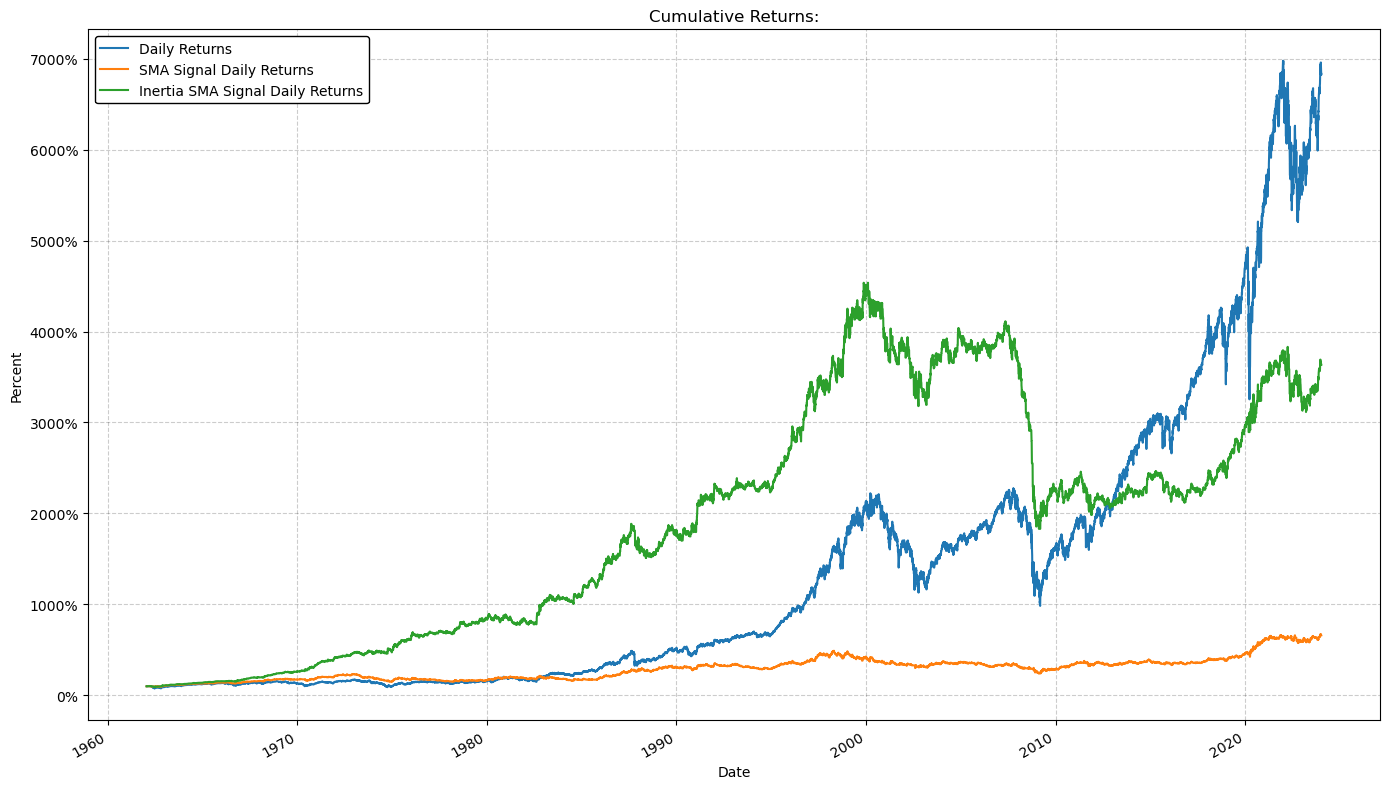

In [25]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        , 'SMA Signal Daily Returns'
        , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
    ]]
    , "temp_plot"
    # , plot_title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [26]:
# Composite Signals DF

# Create the dataframe
trading_signals_df = sp500_reference_dataframe.copy()

# Add the Manual Signal values
trading_signals_df['Manual Signal'] = manual_signals_df['Manual Signal']

# Add the SMA Comparison values
trading_signals_df['SMA Signal'] = sma_window_comparison_df['SMA Signal']

# Add the Inertia SMA values
trading_signals_df['Inertia SMA Signal'] = sma_inertia_df['Inertia SMA Signal']

# Add the Balanced Inertia SMA values
trading_signals_df['Balanced Inertia SMA Signal'] = sma_balanced_inertia_df['Balanced Inertia SMA Signal']

In [27]:
trading_signals_df = trading_signals_df.dropna()

trading_signals_df.head(50)

,Adj Close,Daily Returns,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal
Date,,,,,,
1962-01-22,68.809998,0.000873,1.0,0.0,0.0,0.0
1962-01-23,68.290001,-0.007557,1.0,0.0,0.0,1.0
1962-01-24,68.400002,0.001611,1.0,0.0,1.0,0.0
1962-01-25,68.349998,-0.000731,1.0,0.0,0.0,0.0
1962-01-26,68.129997,-0.003219,1.0,0.0,0.0,0.0
1962-01-29,67.900002,-0.003376,1.0,0.0,0.0,0.0
1962-01-30,68.169998,0.003976,1.0,0.0,0.0,1.0
1962-01-31,68.839996,0.009828,1.0,0.0,1.0,1.0
1962-02-01,69.260002,0.006101,1.0,0.0,1.0,1.0


### Creating a Feature Dataset

Note that the target column is also in the dataset.

Handling NA() values in the rolling window:
- https://stackoverflow.com/questions/71788354/pandas-rolling-mean-and-ignore-nan

In [28]:
# Create the dataframe
# features_and_target_df = trading_signals_df[['Balanced Inertia SMA Signal']].copy()
features_and_target_df = trading_signals_df[['Manual Signal']].copy()

# features_and_target_df = features_and_target_df.rename(columns={'Balanced Inertia SMA Signal':'Signal'})
features_and_target_df = features_and_target_df.rename(columns={'Manual Signal':'Signal'})

In [29]:
# # Add features to the dataframe

sma_short_window_var = 4
sma_mid_window_var = 10
sma_long_window_var = 15

tbill_summary_df['DTB3'] = pd.to_numeric(tbill_summary_df['DTB3'], errors='coerce')
# # S&P attributes

# Percent change from the day before
features_and_target_df['SP500_pct_change'] = sp500_reference_dataframe['Daily Returns']

# Percent change in the SMA short window since yesterday
features_and_target_df['SP500_SMA_short_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_short_window_var).mean().pct_change()

# Percent change in the SMA mid window since yesterday
features_and_target_df['SP500_SMA_mid_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_mid_window_var).mean().pct_change()

# Percent change in the SMA long window since yesterday
features_and_target_df['SP500_SMA_long_pct_change'] = sp500_reference_dataframe['Adj Close'].rolling(window=sma_long_window_var).mean().pct_change()


# # # Treasury Bill Attributes: Note that all of the Treasury Bill values are already percents

# # 3 Month Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US3M_pct_change'] = tbill_summary_df[['DTB3']].dropna() - tbill_summary_df[['DTB3']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US3M_SMA_short_pct_change'] = tbill_summary_df[['DTB3']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US3M_SMA_mid_pct_change'] = tbill_summary_df[['DTB3']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US3M_SMA_long_pct_change'] = tbill_summary_df[['DTB3']].dropna().rolling(window=sma_long_window_var).mean()

# # 2 Year Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US1Y_pct_change'] = tbill_summary_df[['US1Y']].dropna() - tbill_summary_df[['US1Y']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US1Y_SMA_short_pct_change'] = tbill_summary_df[['US1Y']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US1Y_SMA_mid_pct_change'] = tbill_summary_df[['US1Y']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US1Y_SMA_long_pct_change'] = tbill_summary_df[['US1Y']].dropna().rolling(window=sma_long_window_var).mean()

# # 10 Year Treasury Bill attributes

# Percent change from the day before
features_and_target_df['US10Y_pct_change'] = tbill_summary_df[['US10Y']].dropna() - tbill_summary_df[['US10Y']].dropna().shift()

# Percent change in the SMA short window since yesterday
features_and_target_df['US10Y_SMA_short_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_short_window_var).mean()

# Percent change in the SMA mid window since yesterday
features_and_target_df['US10Y_SMA_mid_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_mid_window_var).mean()

# Percent change in the SMA long window since yesterday
features_and_target_df['US10Y_SMA_long_pct_change'] = tbill_summary_df[['US10Y']].dropna().rolling(window=sma_long_window_var).mean()

In [30]:
# tbill_summary_df.head(1)

In [31]:
# sp500_reference_dataframe.head(1)

In [32]:
# # Michael's Features
# Yield Curves
features_and_target_df['Yield Curve 1'] = tbill_summary_df['US10Y'] - tbill_summary_df['DTB3']
features_and_target_df['Yield Curve 2'] = tbill_summary_df['US10Y'] - tbill_summary_df['US2Y']

# Volatility
features_and_target_df["Volatility_Short"] = sp500_reference_dataframe["Adj Close"] / ( sp500_reference_dataframe["Adj Close"].rolling(window=sma_short_window_var).mean() )
features_and_target_df["Volatility_Mid"] = sp500_reference_dataframe["Adj Close"] / ( sp500_reference_dataframe["Adj Close"].rolling(window=sma_mid_window_var).mean() )
features_and_target_df["Volatility_Long"] = sp500_reference_dataframe["Adj Close"] / ( sp500_reference_dataframe["Adj Close"].rolling(window=sma_long_window_var).mean() )

In [33]:
features_and_target_df = features_and_target_df.dropna()

features_and_target_df.head(20)

,Signal,SP500_pct_change,SP500_SMA_short_pct_change,SP500_SMA_mid_pct_change,SP500_SMA_long_pct_change,US3M_pct_change,US3M_SMA_short_pct_change,US3M_SMA_mid_pct_change,US3M_SMA_long_pct_change,US1Y_pct_change,...,US1Y_SMA_long_pct_change,US10Y_pct_change,US10Y_SMA_short_pct_change,US10Y_SMA_mid_pct_change,US10Y_SMA_long_pct_change,Yield Curve 1,Yield Curve 2,Volatility_Short,Volatility_Mid,Volatility_Long
Date,,,,,,,,,,,,,,,,,,,,,
1976-06-01,1.0,-0.003294,0.000904,-0.001234,-0.002142,0.06,5.4975,5.432,5.334667,-0.05,...,6.540667,-0.02,7.9600,7.959,7.949333,2.39,0.68,1.001630,0.995136,0.989469
1976-06-02,1.0,0.003706,0.002207,-0.001036,-0.001804,0.02,5.5250,5.461,5.367333,0.02,...,6.574000,0.00,7.9575,7.959,7.950667,2.37,0.71,1.003128,0.999860,0.994930
1976-06-03,1.0,-0.000898,0.001877,-0.001048,-0.001747,-0.05,5.5325,5.482,5.392667,0.01,...,6.602000,-0.02,7.9400,7.957,7.949333,2.40,0.70,1.000350,1.000010,0.995777
1976-06-04,1.0,-0.009787,-0.002573,-0.002846,-0.001996,-0.06,5.5250,5.489,5.416667,-0.13,...,6.621333,-0.03,7.9225,7.951,7.947333,2.43,0.77,0.993114,0.993049,0.988002
1976-06-07,1.0,-0.005245,-0.003055,-0.002634,-0.001800,-0.01,5.5000,5.490,5.436000,-0.09,...,6.627333,-0.01,7.9075,7.939,7.944000,2.43,0.79,0.990933,0.990450,0.984593
1976-06-08,1.0,0.001724,-0.003567,-0.000643,-0.001524,0.00,5.4700,5.490,5.451333,0.04,...,6.634000,0.02,7.8975,7.931,7.941333,2.45,0.79,0.996194,0.992795,0.987796
1976-06-09,1.0,-0.000607,-0.003504,-0.000754,-0.001680,-0.01,5.4500,5.488,5.462000,-0.02,...,6.641333,0.00,7.8925,7.927,7.938667,2.46,0.82,0.999089,0.992941,0.988857
1976-06-10,1.0,0.008305,0.001037,0.000221,-0.001082,-0.01,5.4425,5.485,5.470000,0.00,...,6.642000,-0.04,7.8850,7.918,7.933333,2.43,0.86,1.006343,1.000965,0.998149
1976-06-11,1.0,0.013660,0.005787,0.001548,-0.000722,-0.01,5.4350,5.478,5.472000,-0.04,...,6.631333,0.00,7.8800,7.905,7.927333,2.44,0.83,1.014220,1.013070,1.012514


In [34]:
# tbill_summary_df[['US10Y']].loc['2021-01-15':'2021-02-25']

## Logistic Regression Model

In [35]:
# Split the data into training and testing sets based on dates
train_data = features_and_target_df.loc['1976-01-01':'2007-12-31']
test_data = features_and_target_df.loc["2008-01-01":"2024-01-08"]

In [36]:
# Check the class sizes of the signals
train_data['Signal'].value_counts()

Signal
1.0    5664
0.0    2220
Name: count, dtype: int64

In [37]:
# Create the training and testing dataframes
X_train = train_data.drop(columns=['Signal'])
y_train = train_data['Signal']

X_test = test_data.drop(columns=['Signal'])
y_test = test_data['Signal']

# Review the features dataframe
# X_train.head()
# y_train.head()
# X_test.head()
# y_test.head()

In [38]:
# Scale the features using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Create an instance of the LR model
logistic_regression = LogisticRegression()

# Fit the model
logistic_regression = logistic_regression.fit(X_train_scaled, y_train)

# Make predictions:
predicted_signals = logistic_regression.predict(X_test_scaled)

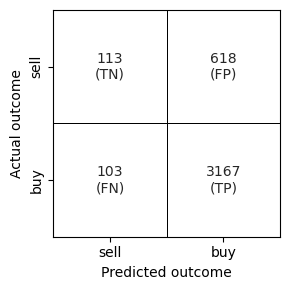

In [40]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, predicted_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='lr', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [41]:
# Make a classification report
print(classification_report(y_test, predicted_signals))

              precision    recall  f1-score   support

         0.0       0.52      0.15      0.24       731
         1.0       0.84      0.97      0.90      3270

    accuracy                           0.82      4001
   macro avg       0.68      0.56      0.57      4001
weighted avg       0.78      0.82      0.78      4001



In [42]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
lr_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
lr_signals_df['LR Model Signals'] = predicted_signals

# Review the copied dataframe
lr_signals_df.head()

,Signal,LR Model Signals
Date,,
2008-01-02,0.0,0.0
2008-01-03,0.0,0.0
2008-01-04,0.0,0.0
2008-01-07,0.0,0.0
2008-01-08,0.0,0.0


In [43]:
# Add the LR Model Returns to the composite_daily_returns_df
composite_daily_returns_df['LR Model Returns'] = composite_daily_returns_df['Daily Returns'] * lr_signals_df['LR Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head(50)

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,LR Model Returns
Date,,,,,
2008-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-04,-0.024552,-0.000000,-0.000000,-0.000000,-0.000000
2008-01-07,0.003223,0.000000,0.000000,0.000000,0.000000
2008-01-08,-0.018352,-0.000000,-0.000000,-0.000000,-0.000000
2008-01-09,0.013624,0.000000,0.000000,0.000000,0.000000
2008-01-10,0.007948,0.000000,0.000000,0.007948,0.000000
2008-01-11,-0.013595,-0.000000,-0.013595,-0.000000,-0.000000
2008-01-14,0.010871,0.000000,0.000000,0.010871,0.000000
2008-01-15,-0.024925,-0.000000,-0.024925,-0.000000,-0.000000


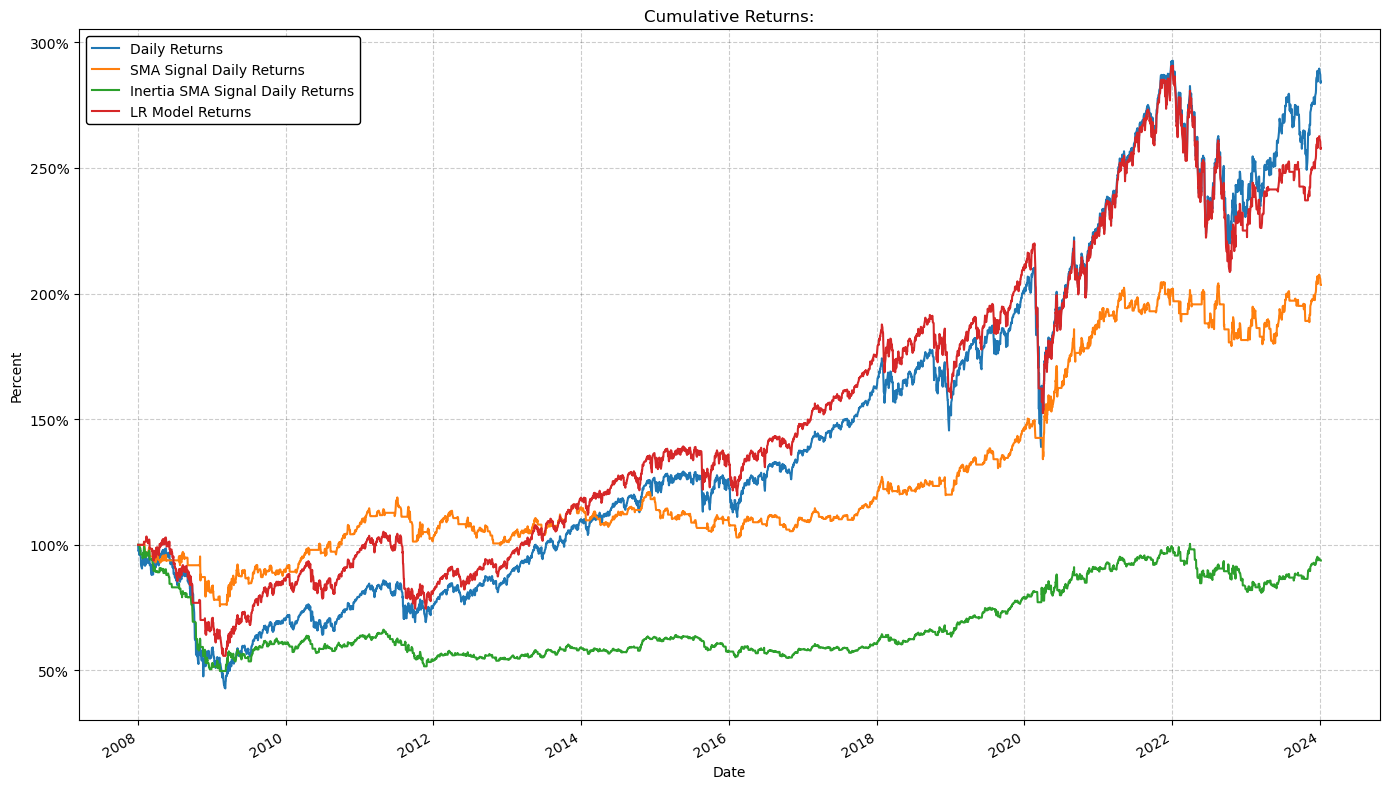

In [44]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        , 'SMA Signal Daily Returns'
        , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        , 'LR Model Returns'
    ]]
    , "temp_plot"
    # , plot_title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [45]:
# Append the signals to the trading_signals_df
trading_signals_df['LR Model Signals'] = lr_signals_df['LR Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals
Date,,,,,,,
2008-01-02,1447.160034,-0.014438,0.0,0.0,0.0,0.0,0.0
2008-01-03,1447.160034,0.000000,0.0,0.0,0.0,0.0,0.0
2008-01-04,1411.630005,-0.024552,0.0,0.0,0.0,0.0,0.0
2008-01-07,1416.180054,0.003223,0.0,0.0,0.0,0.0,0.0
2008-01-08,1390.189941,-0.018352,0.0,0.0,0.0,0.0,0.0


### Neural Network Model

Note that this intentionally uses the same training and test data sets as the logistic regression model above.

In [46]:
# Define the the number of inputs (features) to the model
# The number of features in the dataset is the length of any row
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

21

In [47]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [48]:
# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer1 = (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

11

In [49]:
# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

6

In [50]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
# Specify the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
# Specify the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                242       
                                                                 
 dense_1 (Dense)             (None, 6)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
#from keras.callbacks import EarlyStopping

# Define early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



# Train the model and capture the training history
#history_nn = nn.fit(X_train_scaled, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plot the training accuracy over epochs
#plt.plot(history_nn.history['accuracy'], label='Training Accuracy')
#plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

In [53]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=6)

Epoch 1/6
247/247 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.6728
Epoch 2/6
247/247 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7889
Epoch 3/6
247/247 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.7960
Epoch 4/6
247/247 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8043
Epoch 5/6
247/247 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8124
Epoch 6/6
247/247 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8153


In [54]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

126/126 - 0s - loss: 0.4053 - accuracy: 0.8428 - 189ms/epoch - 2ms/step
Loss: 0.40531018376350403, Accuracy: 0.8427892923355103


In [55]:
# Predict the signals
nn_predictions = nn.predict(X_test_scaled)

# Review the predictions
nn_predictions[:10]

126/126 [==============================] - 0s 792us/step


array([[0.48950228],
       [0.7766139 ],
       [0.5129337 ],
       [0.7278421 ],
       [0.48288602],
       [0.53189594],
       [0.6097087 ],
       [0.26363894],
       [0.72613627],
       [0.33135894]], dtype=float32)

In [56]:
# The signals must be a 0 or 1, but sigmoid outputs a continuous value
# Whenever the prediction is greater than or equal to 0.5, make the signal a 1
# Otherwise make the signal 0

# Initialize an empty array
nn_signals = []

# Assign the signals
for i in range(0,len(nn_predictions)):
    if nn_predictions[i] >= 0.5:
        nn_signals.append(1.0)
    else:
        nn_signals.append(0.0)

In [57]:
# Review the value counts for each signal
pd.DataFrame(nn_signals).value_counts()

1.0    3761
0.0     240
Name: count, dtype: int64

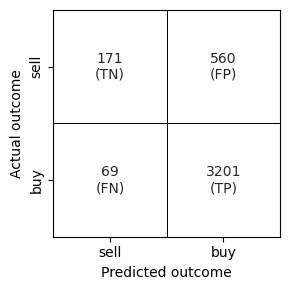

In [58]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, nn_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='nn', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [59]:
# Make a classification report
print(classification_report(y_test, nn_signals))

              precision    recall  f1-score   support

         0.0       0.71      0.23      0.35       731
         1.0       0.85      0.98      0.91      3270

    accuracy                           0.84      4001
   macro avg       0.78      0.61      0.63      4001
weighted avg       0.83      0.84      0.81      4001



In [60]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
nn_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
nn_signals_df['NN Model Signals'] = nn_signals

# Review the copied dataframe
nn_signals_df.head()

,Signal,NN Model Signals
Date,,
2008-01-02,0.0,0.0
2008-01-03,0.0,1.0
2008-01-04,0.0,1.0
2008-01-07,0.0,1.0
2008-01-08,0.0,0.0


In [61]:
# Add the NN Model Returns to the composite_daily_returns_df
composite_daily_returns_df['NN Model Returns'] = composite_daily_returns_df['Daily Returns'] * nn_signals_df['NN Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head(50)

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,LR Model Returns,NN Model Returns
Date,,,,,,
2008-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-04,-0.024552,-0.000000,-0.000000,-0.000000,-0.000000,-0.024552
2008-01-07,0.003223,0.000000,0.000000,0.000000,0.000000,0.003223
2008-01-08,-0.018352,-0.000000,-0.000000,-0.000000,-0.000000,-0.018352
2008-01-09,0.013624,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-10,0.007948,0.000000,0.000000,0.007948,0.000000,0.007948
2008-01-11,-0.013595,-0.000000,-0.013595,-0.000000,-0.000000,-0.013595
2008-01-14,0.010871,0.000000,0.000000,0.010871,0.000000,0.000000
2008-01-15,-0.024925,-0.000000,-0.024925,-0.000000,-0.000000,-0.024925


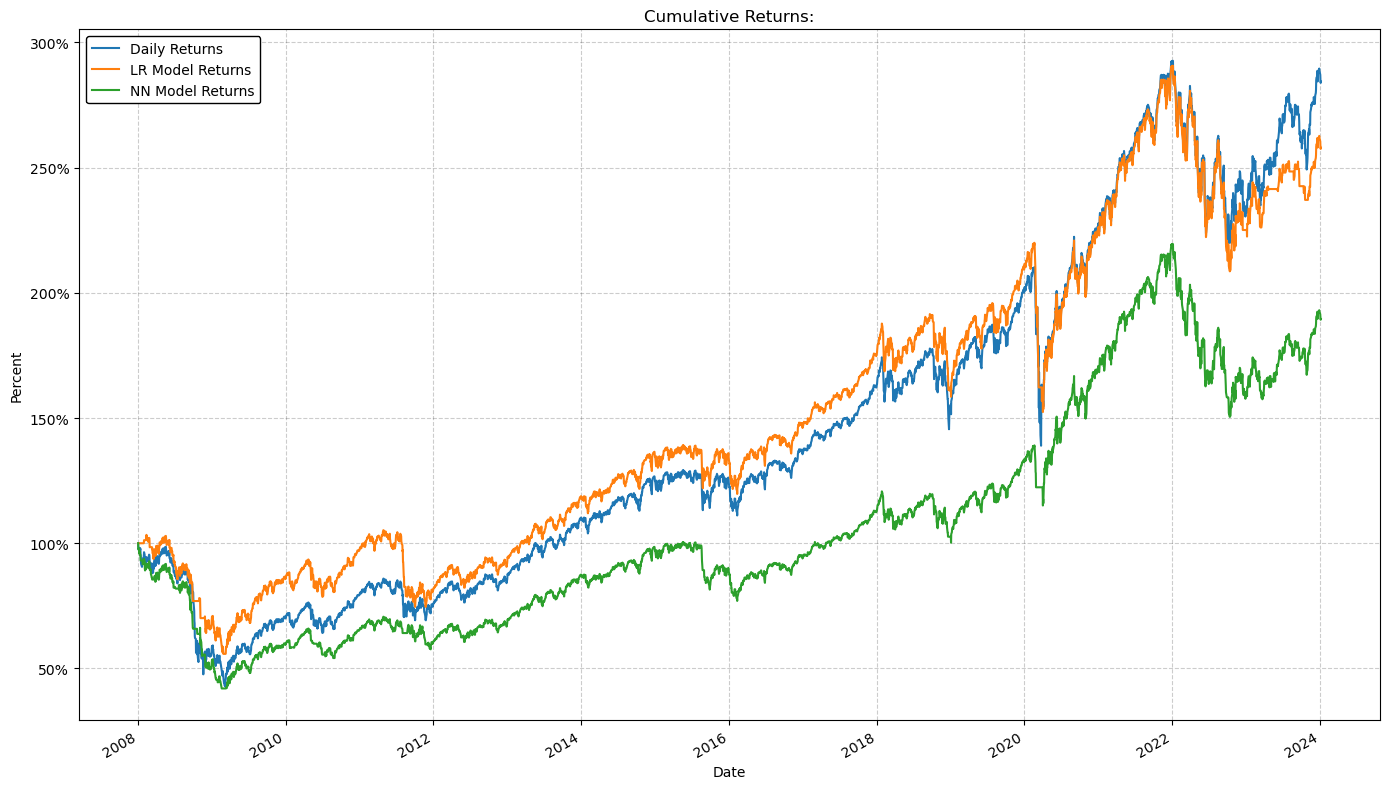

In [62]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        # , 'SMA Signal Daily Returns'
        # , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        , 'LR Model Returns'
        , 'NN Model Returns'
    ]]#.loc['2022-01-01':'2022-12-31']
    , "temp_plot"
    # , plot_title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [63]:
# Append the signals to the trading_signals_df
trading_signals_df['NN Model Signals'] = nn_signals_df['NN Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals,NN Model Signals
Date,,,,,,,,
2008-01-02,1447.160034,-0.014438,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,1447.160034,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
2008-01-04,1411.630005,-0.024552,0.0,0.0,0.0,0.0,0.0,1.0
2008-01-07,1416.180054,0.003223,0.0,0.0,0.0,0.0,0.0,1.0
2008-01-08,1390.189941,-0.018352,0.0,0.0,0.0,0.0,0.0,0.0


### LSTM Neural Network

In [64]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [65]:
# X_train_reshaped[0]

In [66]:
# Define the the number of inputs (features) to the model
# The number of features in the dataset is the length of any row
number_input_features = len(X_train_reshaped[0][0])

# Review the number of features
number_input_features

21

In [67]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [68]:
# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer1 = (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

11

In [69]:
# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output neurons
# Use the Python floor division (//) to return the quotient
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

6

In [70]:
# Create the Sequential model instance
lstm = Sequential()

# Add the first hidden layer
# Specify the number of inputs, the number of hidden nodes, and the activation function
lstm.add(LSTM(units=hidden_nodes_layer1, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu'))

# Add the second hidden layer
# Specify the number of hidden nodes and the activation function
lstm.add(LSTM(units=hidden_nodes_layer2, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
lstm.add(Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 11)             1452      
                                                                 
 lstm_1 (LSTM)               (None, 6)                 432       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1891 (7.39 KB)
Trainable params: 1891 (7.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Compile the Sequential model
lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:

# Train the model and capture the training history
#history_lstm = lstm.fit(X_train_reshaped, y_train, epochs=10000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plot the training accuracy over epochs
#plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
#plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

In [73]:
lstm.fit(X_train_reshaped, y_train, epochs=20
         #, batch_size=32, validation_split=0.2
        )

Epoch 1/20
247/247 [==============================] - 2s 2ms/step - loss: 0.5893 - accuracy: 0.7789
Epoch 2/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.8042
Epoch 3/20
247/247 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8109
Epoch 4/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8177
Epoch 5/20
247/247 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8218
Epoch 6/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3919 - accuracy: 0.8233
Epoch 7/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8275
Epoch 8/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.8324
Epoch 9/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8385
Epoch 10/20
247/247 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8417

In [74]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = lstm.evaluate(X_test_reshaped,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

126/126 - 0s - loss: 1.0566 - accuracy: 0.7938 - 333ms/epoch - 3ms/step
Loss: 1.056647539138794, Accuracy: 0.7938015460968018


In [75]:
# Predict the signals
lstm_predictions = lstm.predict(X_test_reshaped)

# Review the predictions
lstm_predictions[:10]

126/126 [==============================] - 0s 955us/step


array([[0.07968972],
       [0.66077137],
       [0.09658324],
       [0.20798543],
       [0.14260767],
       [0.10693138],
       [0.16674393],
       [0.04833357],
       [0.2087102 ],
       [0.05991241]], dtype=float32)

In [76]:
# The signals must be a 0 or 1, but sigmoid outputs a continuous value
# Whenever the prediction is greater than or equal to 0.5, make the signal a 1
# Otherwise make the signal 0

# Initialize an empty array
lstm_signals = []

# Assign the signals
for i in range(0,len(lstm_predictions)):
    if lstm_predictions[i] >= 0.5:
        lstm_signals.append(1.0)
    else:
        lstm_signals.append(0.0)

In [77]:
# Review the value counts for each signal
pd.DataFrame(lstm_signals).value_counts()

1.0    3603
0.0     398
Name: count, dtype: int64

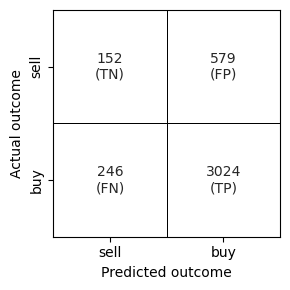

In [78]:
# Make a confusion matrix and save it to the Reports folder
plot_confusion_matrix(
    confusion_matrix(y_test, lstm_signals), # confusion_matrix from sklearn.metrics
    ['sell','buy'], # formatted as a list, e.g. ['sell','buy']
    # title=None, # Title of the plot
    # normalize=False, # If the confusion_matrix is normalized, the values will be floats, not integers
    filename='lstm', # Filename in the savefig string
    # cmap='gray_r', # Inverse grayscale
    # linecolor='k', # Set the line color to black
    labelplot=True # Label the plot with TP, FP, FN, and TN
    )

In [79]:
# Make a classification report
print(classification_report(y_test, lstm_signals))

              precision    recall  f1-score   support

         0.0       0.38      0.21      0.27       731
         1.0       0.84      0.92      0.88      3270

    accuracy                           0.79      4001
   macro avg       0.61      0.57      0.57      4001
weighted avg       0.76      0.79      0.77      4001



In [80]:
# Append the signals to a copy of the y_test dataframe so that the values are organized by index

# Create a copy of the y_test dataframe
lstm_signals_df = test_data[['Signal']].copy()

# Append the predicted signals to the dataframe
lstm_signals_df['LSTM Model Signals'] = lstm_signals

# Review the copied dataframe
lstm_signals_df.head()

,Signal,LSTM Model Signals
Date,,
2008-01-02,0.0,0.0
2008-01-03,0.0,1.0
2008-01-04,0.0,0.0
2008-01-07,0.0,0.0
2008-01-08,0.0,0.0


In [81]:
# Add the NN Model Returns to the composite_daily_returns_df
composite_daily_returns_df['LSTM Model Returns'] = composite_daily_returns_df['Daily Returns'] * lstm_signals_df['LSTM Model Signals'].shift()

# Drop NAs if desired
composite_daily_returns_df = composite_daily_returns_df.dropna()

# Review the df
composite_daily_returns_df.head(50)

,Daily Returns,SMA Signal Daily Returns,Inertia SMA Signal Daily Returns,Balanced Inertia SMA Signal Daily Returns,LR Model Returns,NN Model Returns,LSTM Model Returns
Date,,,,,,,
2008-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-04,-0.024552,-0.000000,-0.000000,-0.000000,-0.000000,-0.024552,-0.024552
2008-01-07,0.003223,0.000000,0.000000,0.000000,0.000000,0.003223,0.000000
2008-01-08,-0.018352,-0.000000,-0.000000,-0.000000,-0.000000,-0.018352,-0.000000
2008-01-09,0.013624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-10,0.007948,0.000000,0.000000,0.007948,0.000000,0.007948,0.000000
2008-01-11,-0.013595,-0.000000,-0.013595,-0.000000,-0.000000,-0.013595,-0.000000
2008-01-14,0.010871,0.000000,0.000000,0.010871,0.000000,0.000000,0.000000
2008-01-15,-0.024925,-0.000000,-0.024925,-0.000000,-0.000000,-0.024925,-0.000000


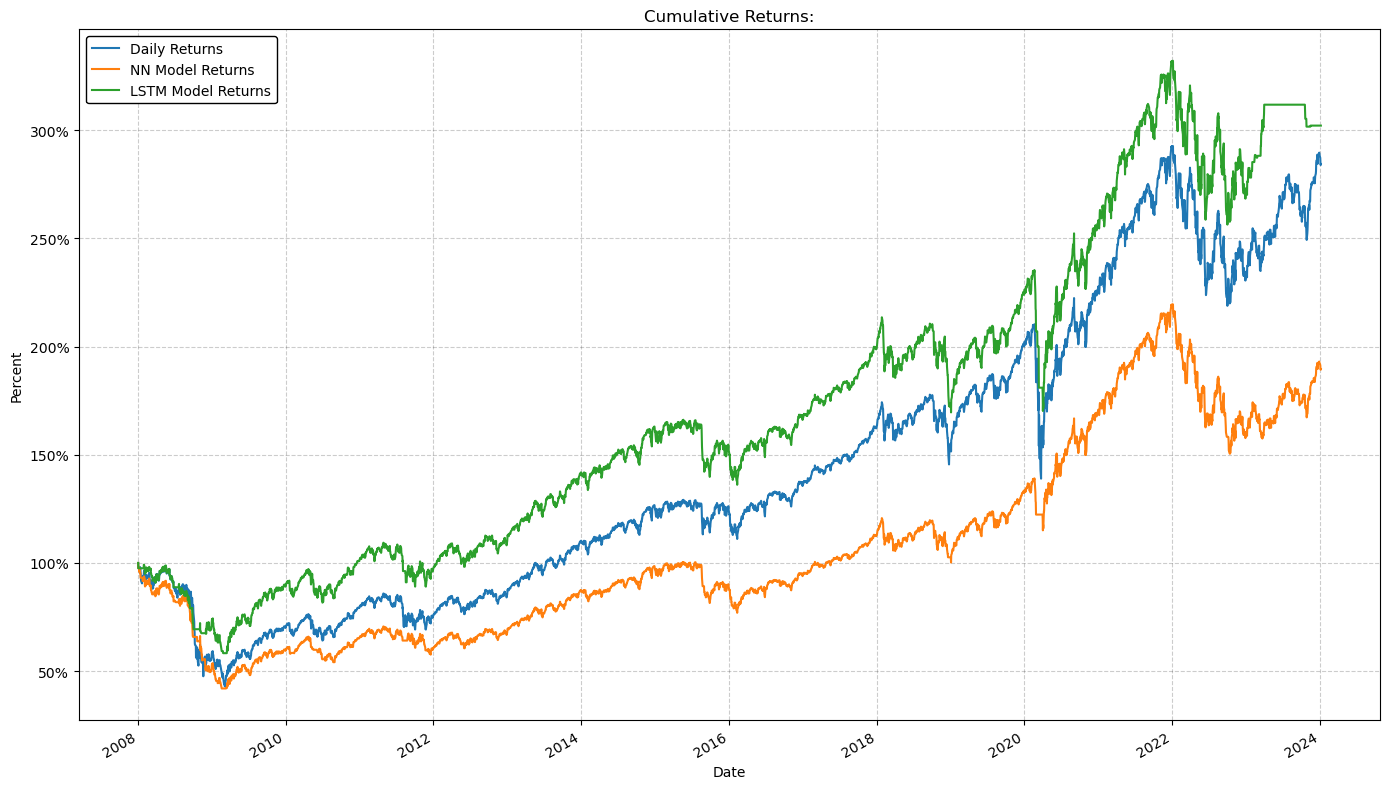

In [82]:
cumulative_returns_plot(
    composite_daily_returns_df[[
        'Daily Returns'
        # , 'SMA Signal Daily Returns'
        # , 'Inertia SMA Signal Daily Returns'
        # , 'Balanced Inertia SMA Signal Daily Returns'
        # , 'LR Model Returns'
        , 'NN Model Returns'
        , 'LSTM Model Returns'
    ]]#.loc['2022-01-01':'2022-12-31']
    , "temp_plot"
    # , plot_title_text="Cumulative Returns:\n\n" # Variable and default value for the plot title
)

In [83]:
# Append the signals to the trading_signals_df
trading_signals_df['LSTM Model Signals'] = lstm_signals_df['LSTM Model Signals']

# Drop NAs if desired
trading_signals_df = trading_signals_df.dropna()

# Review the trading_signals_df
trading_signals_df.head()

,Adj Close,Daily Returns,Manual Signal,SMA Signal,Inertia SMA Signal,Balanced Inertia SMA Signal,LR Model Signals,NN Model Signals,LSTM Model Signals
Date,,,,,,,,,
2008-01-02,1447.160034,-0.014438,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-01-03,1447.160034,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2008-01-04,1411.630005,-0.024552,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2008-01-07,1416.180054,0.003223,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2008-01-08,1390.189941,-0.018352,0.0,0.0,0.0,0.0,0.0,0.0,0.0
